In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/TechStartup.csv'
startup_data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
startup_data.head()

,Startup_Name,Type_of_Startup,Industry,Location,Founded_Year,Team_Size,Revenue,Expenses,Funding_Amount,Founder_Experience,Market_Trends,Success
0,TechCo1,SaaS,Software,Silicon Valley,2010,20,1000000,500000,2000000,5,Positive,Yes
1,InnovateTech,Hardware,Hardware & Devices,Boston,2012,15,500000,300000,1000000,3,Stable,Yes
2,NextGenTech,Mobile App,Technology & Mobile Apps,New York,2015,10,200000,150000,500000,2,Declining,No
3,QuantumInnovations,AI/ML,Artificial Intelligence,San Francisco,2011,25,800000,400000,1500000,4,Positive,Yes
4,FutureTechHub,Blockchain,Blockchain & Cryptocurrency,London,2013,18,300000,200000,800000,2,Stable,No


In [ ]:
# Display summary statistics for numerical columns
print("\nSummary statistics:")
startup_data.describe()


Summary statistics:


,Founded_Year,Team_Size,Revenue,Expenses,Funding_Amount,Founder_Experience
count,100.000000,100.0000,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,2016.220000,18.2000,6.720000e+05,368000.000000,1.405000e+06,3.570000
std,2.873002,5.8741,3.091468e+05,137899.099403,5.800340e+05,1.121462
min,2010.000000,10.0000,2.000000e+05,150000.000000,5.000000e+05,2.000000
25%,2014.000000,14.0000,4.000000e+05,250000.000000,1.000000e+06,3.000000
50%,2016.000000,17.0000,7.000000e+05,400000.000000,1.500000e+06,4.000000
75%,2019.000000,22.0000,9.000000e+05,450000.000000,1.800000e+06,5.000000
max,2021.000000,30.0000,1.500000e+06,800000.000000,2.500000e+06,5.000000


In [ ]:
# Check for missing values
print("\nMissing values:")
startup_data.isnull().sum()


Missing values:


Startup_Name          0
Type_of_Startup       0
Industry              0
Location              0
Founded_Year          0
Team_Size             0
Revenue               0
Expenses              0
Funding_Amount        0
Founder_Experience    0
Market_Trends         0
Success               0
dtype: int64

In [ ]:
# Display data types of each column
print("\nData types:")
startup_data.dtypes


Data types:


Startup_Name          object
Type_of_Startup       object
Industry              object
Location              object
Founded_Year           int64
Team_Size              int64
Revenue                int64
Expenses               int64
Funding_Amount         int64
Founder_Experience     int64
Market_Trends         object
Success               object
dtype: object

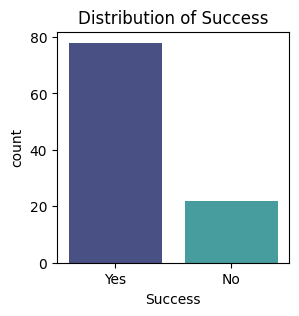

In [ ]:
# Visualize the distribution of the 'Success' column
plt.figure(figsize=(3, 3))
sns.countplot(x='Success', data=startup_data, palette='mako')
plt.title('Distribution of Success')
plt.show()

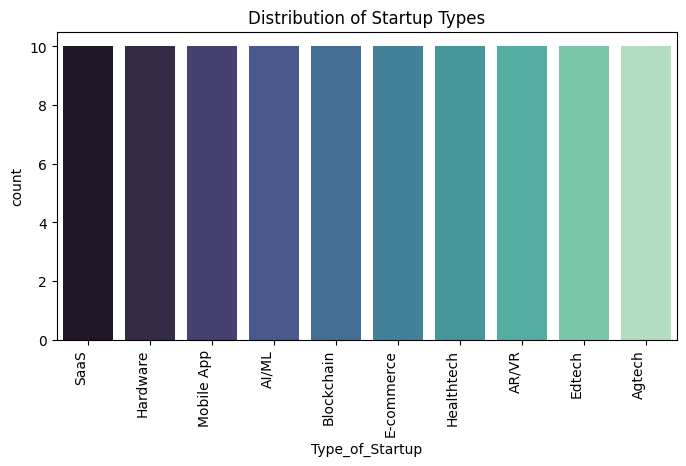

In [ ]:
# Visualize the distribution of startup types
plt.figure(figsize=(8, 4))
sns.countplot(x='Type_of_Startup', data=startup_data ,palette='mako')
plt.title('Distribution of Startup Types')
plt.xticks(rotation=90, ha='right')
plt.show()

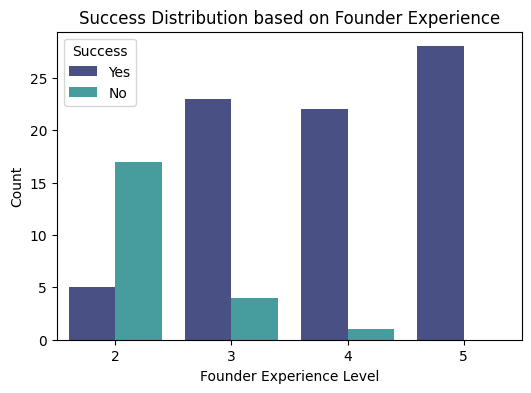

In [ ]:
# Success Distribution based on Founder Experience
plt.figure(figsize=(6,4))
sns.countplot(x='Founder_Experience', hue='Success', data=startup_data, palette='mako')
plt.title('Success Distribution based on Founder Experience')
plt.xlabel('Founder Experience Level')
plt.ylabel('Count')
plt.show()


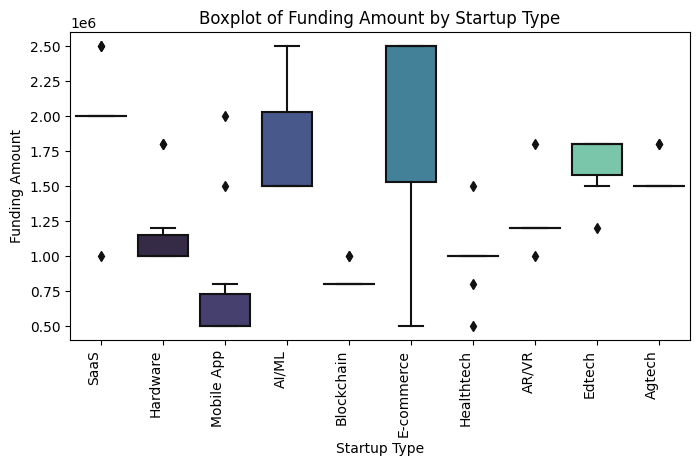

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Funding Amount by Startup Type
plt.figure(figsize=(8, 4))
sns.boxplot(x='Type_of_Startup', y='Funding_Amount', data=startup_data, palette='mako')
plt.title('Boxplot of Funding Amount by Startup Type')
plt.xlabel('Startup Type')
plt.ylabel('Funding Amount')
plt.xticks(rotation=90, ha='right')
plt.show()


<ipython-input-89-9ebe93a0cbd6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = startup_data.corr()


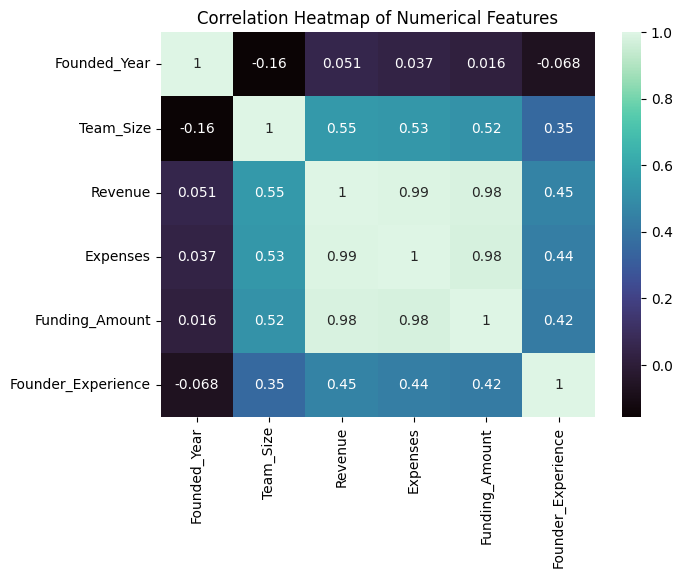

In [ ]:
# Correlation Heatmap of Numerical Features
correlation_matrix = startup_data.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-90-3d748c3de097>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type_of_Startup', y='Revenue', data=startup_data, palette='mako')


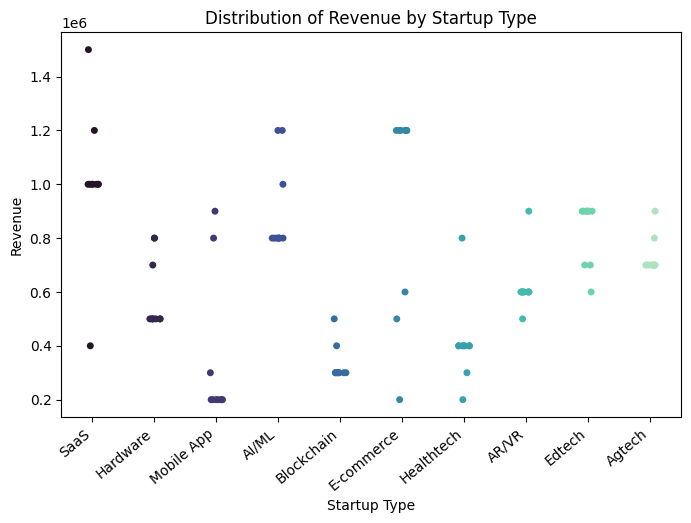

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Revenue by Startup Type
plt.figure(figsize=(8,5))
sns.stripplot(x='Type_of_Startup', y='Revenue', data=startup_data, palette='mako')
plt.title('Distribution of Revenue by Startup Type')
plt.xlabel('Startup Type')
plt.ylabel('Revenue')
plt.xticks(rotation=40, ha='right')
plt.show()


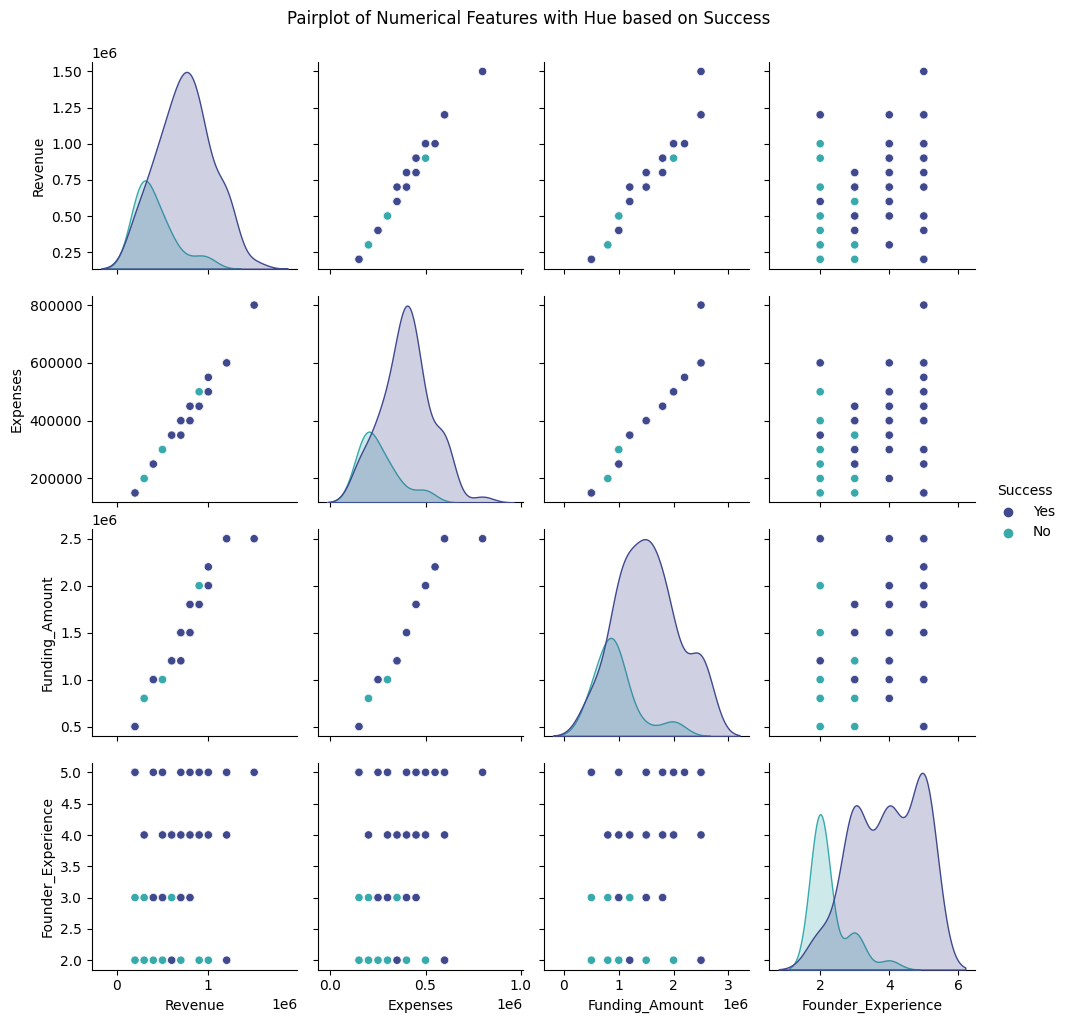

In [ ]:
# Pairplot of Numerical Features with Hue based on Success
sns.pairplot(startup_data[['Revenue', 'Expenses', 'Funding_Amount', 'Founder_Experience', 'Success']], hue='Success', palette='mako')
plt.suptitle('Pairplot of Numerical Features with Hue based on Success', y=1.02)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Drop 'Startup_Name' column as it's not needed for modeling
startup_data = startup_data.drop('Startup_Name', axis=1)

In [ ]:
# Encode the 'Success' column (binary categorical)
label_encoder = LabelEncoder()
startup_data['Success'] = label_encoder.fit_transform(startup_data['Success'])

In [ ]:
# Define features (X) and target variable (y)
X = startup_data.drop('Success', axis=1)
y = startup_data['Success']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define column transformer
categorical_columns = ['Type_of_Startup', 'Industry', 'Location', 'Market_Trends']
numeric_columns = ['Founded_Year', 'Team_Size', 'Revenue', 'Expenses', 'Funding_Amount', 'Founder_Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

In [ ]:
# Initialize classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()


In [ ]:
# Define pipelines
pipelines = [
    ('Logistic Regression', Pipeline([('preprocessor', preprocessor), ('classifier', logistic_regression)])),
    ('Decision Tree', Pipeline([('preprocessor', preprocessor), ('classifier', decision_tree)])),
    ('Random Forest', Pipeline([('preprocessor', preprocessor), ('classifier', random_forest)])),
    ('SVM', Pipeline([('preprocessor', preprocessor), ('classifier', svm)])),
    ('k-NN', Pipeline([('preprocessor', preprocessor), ('classifier', knn)]))
]

In [ ]:

# Train and evaluate each model
for name, model in pipelines:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)*100


    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy} %")



Model: Logistic Regression
Accuracy: 95.0 %

Model: Decision Tree
Accuracy: 95.0 %

Model: Random Forest
Accuracy: 90.0 %

Model: SVM
Accuracy: 90.0 %

Model: k-NN
Accuracy: 90.0 %


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the pipelines for different models
logistic_regression = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression())])
decision_tree = Pipeline([('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
random_forest = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
svm = Pipeline([('preprocessor', preprocessor), ('classifier', SVC())])
knn = Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])

# Create a list of tuples where each tuple contains a name and the corresponding model pipeline
models = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('k-NN', knn)
]

# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Fit the Voting Classifier to the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the Voting Classifier on the test set
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting) * 100  # Convert to percentage

# Print the accuracy for the Voting Classifier
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}%")


Voting Classifier Accuracy: 95.00%


In [ ]:
from joblib import dump

# Save the trained model
dump(voting_classifier, 'voting_classifier_model.joblib')


['voting_classifier_model.joblib']